In [1]:
import os
import pandas as pd
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
d, m, y = '01', '03', '2024'

In [3]:
# change your local path dataset 
path = '/mnt/data/marcos/data/SUNT/sunt/'

In [4]:
path_out = f'{path}{y}-{m}-{d}/output/'

In [15]:
from matplotlib.ticker import FuncFormatter

def thousands_formatter(x, pos):
    return f'{x/10000:.0f}k'  

formatter = FuncFormatter(thousands_formatter)

## OD

In [6]:
od = pd.read_csv(f'{path_out}sobe_desce_{d}-{m}-{y}_esp.csv')
od.head()

/home/marcos/.pyenv/versions/3.9.1/envs/yolov7/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,route_short_name,register_code,direction_id,pt_sequence,stop_id,vehicle,trip_number,trip_id,start_trip,end_trip,stop_time,n-boardings,lag_loading,n-alighting,balance,loading
0,1141,12730,I,1,44028970,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:07:50,8.0,0.0,0.0,0.0,8.0
1,1141,12730,I,2,44783401,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:07:52,5.0,8.0,0.0,8.0,13.0
2,1141,12730,I,3,44783402,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:08:49,5.0,13.0,0.0,13.0,18.0
3,1141,12730,I,4,45833865,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:10:12,6.0,18.0,0.0,18.0,24.0
4,1141,12730,I,5,44739642,21201,1,21201_1141_1,2024-03-01 06:07:50,2024-03-01 07:19:33,2024-03-01 06:11:26,6.0,24.0,0.0,24.0,30.0


In [7]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739266 entries, 0 to 739265
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   route_short_name  739266 non-null  object 
 1   register_code     739266 non-null  int64  
 2   direction_id      739266 non-null  object 
 3   pt_sequence       739266 non-null  int64  
 4   stop_id           739266 non-null  int64  
 5   vehicle           739266 non-null  int64  
 6   trip_number       739266 non-null  int64  
 7   trip_id           739266 non-null  object 
 8   start_trip        739266 non-null  object 
 9   end_trip          739266 non-null  object 
 10  stop_time         739266 non-null  object 
 11  n-boardings       739266 non-null  float64
 12  lag_loading       739266 non-null  float64
 13  n-alighting       739266 non-null  float64
 14  balance           739266 non-null  float64
 15  loading           739266 non-null  float64
dtypes: float64(5), int64

In [8]:
df = od.copy()

### Basic Statistics

In [9]:
# List of columns to calculate statistics
od_columns = ['n-boardings', 'lag_loading', 'n-alighting', 'balance', 'loading']

estatisticas = {}

for coluna in od_columns:
    estatisticas[coluna] = {
        'Count': df[coluna].count(),
        'Mean': df[coluna].mean(),
        'Std': df[coluna].std(),
        'Min': df[coluna].min(),
        '25%': df[coluna].quantile(0.25),
        '50%': df[coluna].median(),
        '75%': df[coluna].quantile(0.75),
        'Max': df[coluna].max(),
        'Unique values': df[coluna].nunique(),
        'Valor Mais Frequente': df[coluna].mode()[0] if not df[coluna].mode().empty else 'Nenhum',
        'Valores Ausentes': df[coluna].isnull().sum()
    }

estatisticas_df = pd.DataFrame(estatisticas).T

print(estatisticas_df)

                Count       Mean        Std  Min       25%        50%  \
n-boardings  739266.0   1.367928   4.086839  0.0  0.000000   0.000000   
lag_loading  739266.0  20.284383  18.438119  0.0  6.000000  15.631166   
n-alighting  739266.0   0.984607   2.500622  0.0  0.000000   0.000000   
balance      739266.0  19.299776  17.842118  0.0  5.544271  14.674401   
loading      739266.0  20.667704  18.285248  0.0  6.682673  16.000000   

                   75%         Max  Unique values  Valor Mais Frequente  \
n-boardings   1.000000  264.000000          133.0                   0.0   
lag_loading  29.482177  264.000000       233283.0                   0.0   
n-alighting   1.213018   85.470199       156750.0                   0.0   
balance      28.000000  264.000000       250389.0                   0.0   
loading      29.745455  264.000000       246457.0                   0.0   

             Valores Ausentes  
n-boardings               0.0  
lag_loading               0.0  
n-alighting   

In [10]:
estatisticas_df.head()

,Count,Mean,Std,Min,25%,50%,75%,Max,Unique values,Valor Mais Frequente,Valores Ausentes
n-boardings,739266.0,1.367928,4.086839,0.0,0.000000,0.000000,1.000000,264.000000,133.0,0.0,0.0
lag_loading,739266.0,20.284383,18.438119,0.0,6.000000,15.631166,29.482177,264.000000,233283.0,0.0,0.0
n-alighting,739266.0,0.984607,2.500622,0.0,0.000000,0.000000,1.213018,85.470199,156750.0,0.0,0.0
balance,739266.0,19.299776,17.842118,0.0,5.544271,14.674401,28.000000,264.000000,250389.0,0.0,0.0
loading,739266.0,20.667704,18.285248,0.0,6.682673,16.000000,29.745455,264.000000,246457.0,0.0,0.0


### BoxPlot

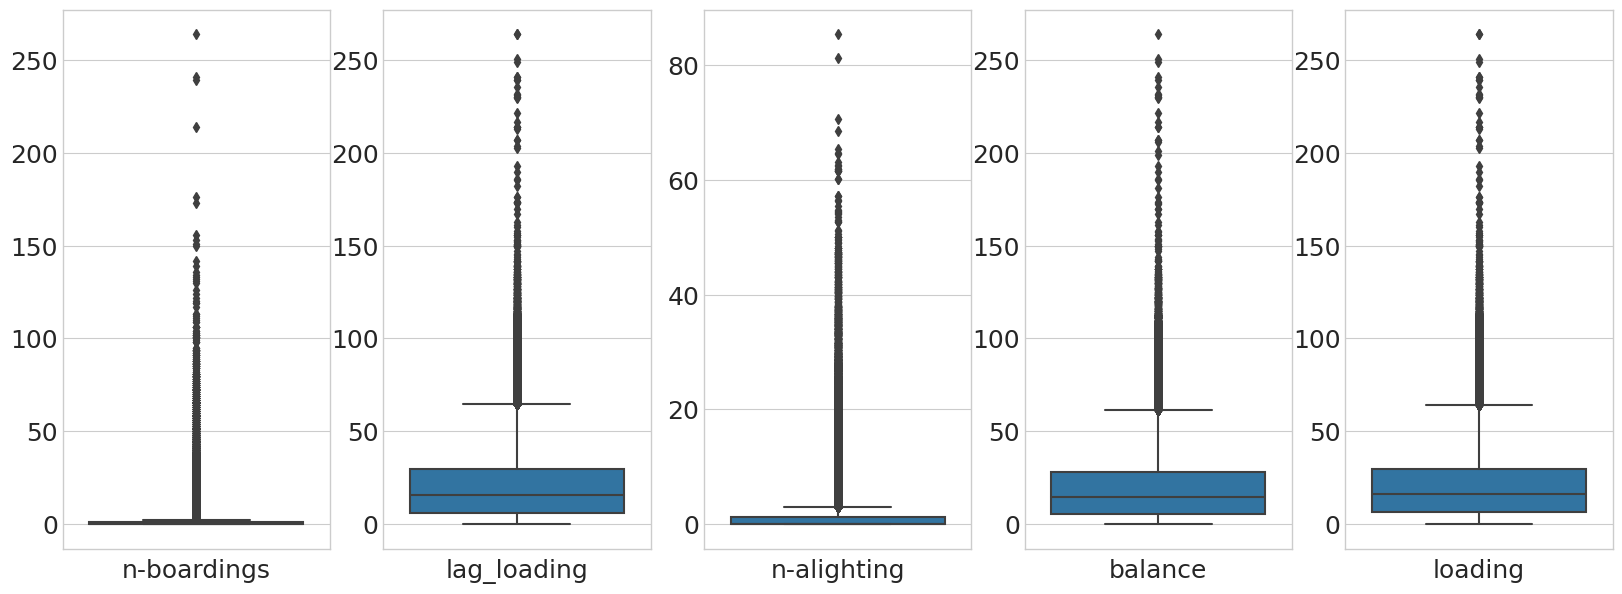

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(20, 7))

sns.boxplot(y=df['n-boardings'],  ax=axs[0])
sns.boxplot(y=df['lag_loading'],  ax=axs[1])
sns.boxplot(y=df['n-alighting'],  ax=axs[2])
sns.boxplot(y=df['balance'], ax=axs[3])
sns.boxplot(y=df['loading'],  ax=axs[4])



for ax in axs:
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)  # X-axis label
    ax.set_ylabel('', fontsize=18)               # Y-axis label
    ax.tick_params(axis='both', which='major', labelsize=18)  # Tick labels

# axs[0].set_title('Box Plot of Boarding')
axs[0].set_xlabel('n-boardings', fontsize=18)
axs[0].set_ylabel('') 

axs[1].set_xlabel('lag_loading', fontsize=18)
axs[1].set_ylabel('') 

# axs[1].set_title('Box Plot of Boarding')
axs[2].set_xlabel('n-alighting', fontsize=18)
axs[2].set_ylabel('') 

# axs[2].set_title('Box Plot of Boarding')
axs[3].set_xlabel('balance', fontsize=18)
axs[3].set_ylabel('') 

# axs[3].set_title('Box Plot of Boarding')
axs[4].set_xlabel('loading', fontsize=18)
axs[4].set_ylabel('') 

plt.savefig('allboxplots.png', dpi=600, bbox_inches='tight', facecolor='white')


# Show the plot
plt.show()

### Histogram

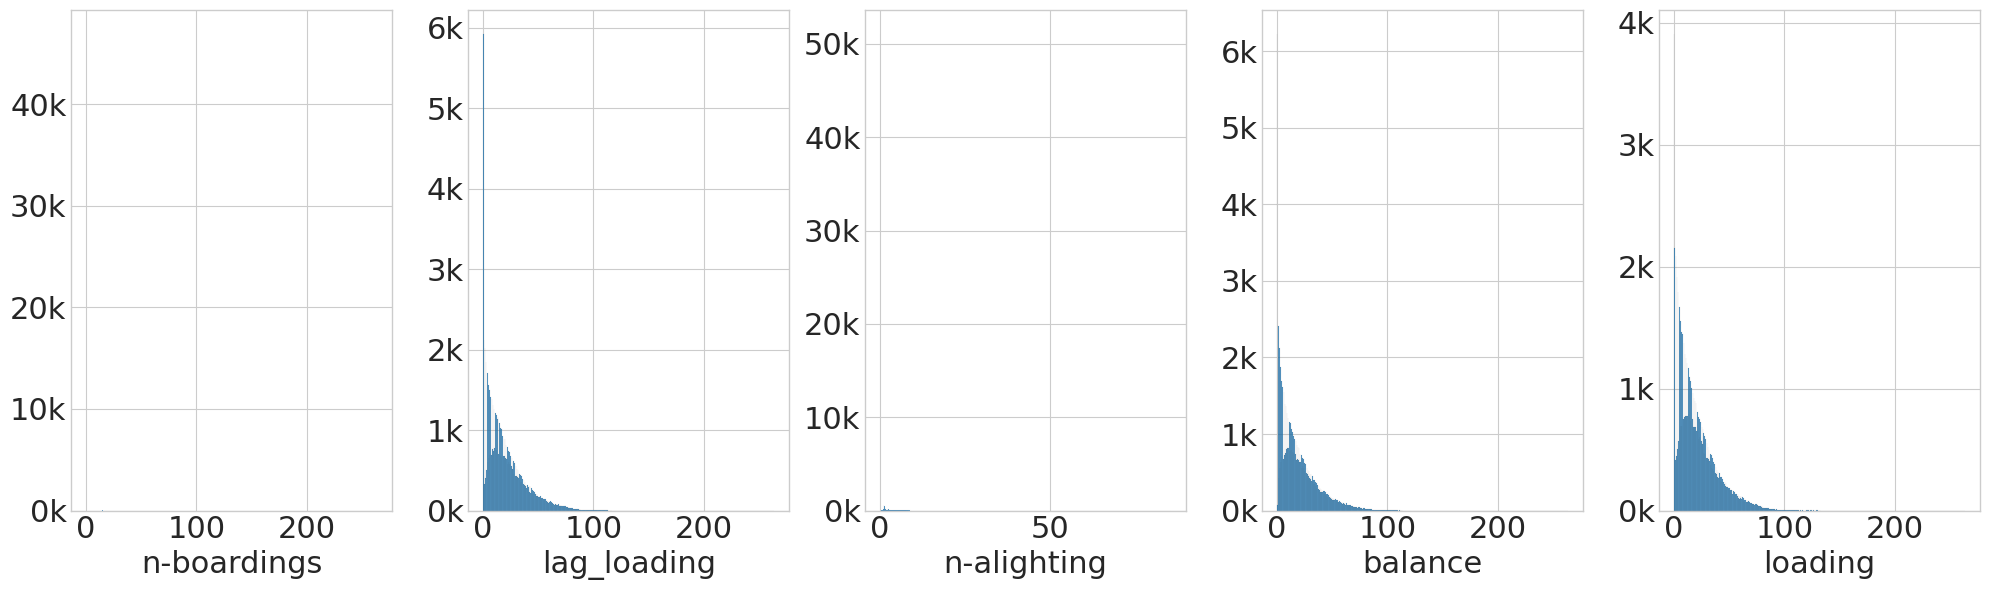

In [16]:
colunas = ['n-boardings', 'lag_loading', 'n-alighting', 'balance', 'loading']

cols_to_plot = 5
fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))

for i in range(len(colunas)):
    sns.histplot(df[colunas[i]], kde=False,  ax=axs[i])
    axs[i].set_xlabel(colunas[i], fontsize=22)
    axs[i].set_ylabel('', fontsize=22)
    axs[i].tick_params(axis='both', labelsize=22)
    axs[i].yaxis.set_major_formatter(formatter)
    #ax.tick_params(axis='both', which='minor', labelsize=10)

plt.tight_layout()
plt.savefig('histatt.png', dpi=600, bbox_inches='tight', facecolor='white')
plt.show()

### Violinplot

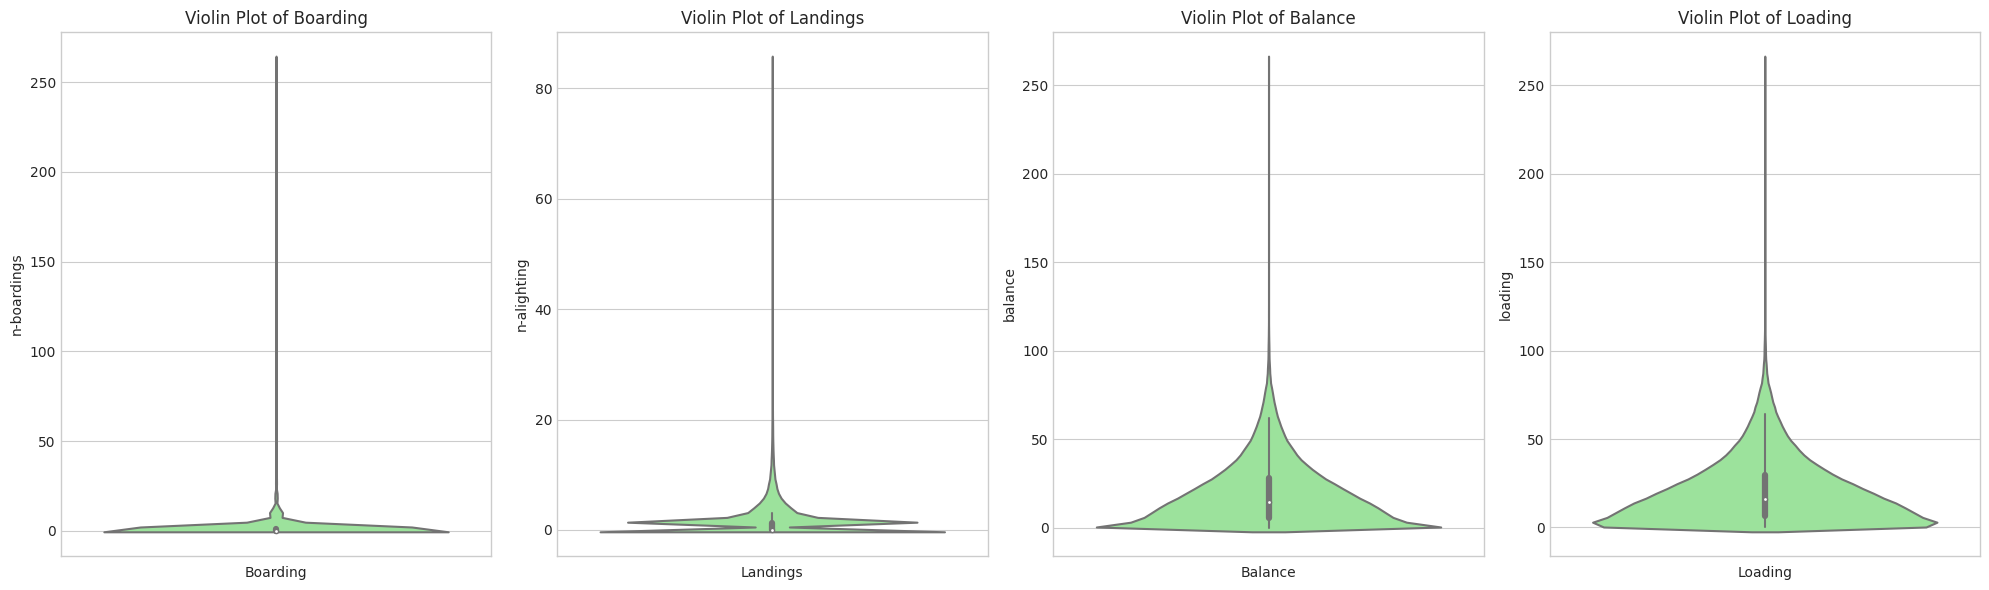

In [17]:
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
# create plots
sns.violinplot(y=df['n-boardings'], color='lightgreen', ax=axs[0])
sns.violinplot(y=df['n-alighting'], color='lightgreen', ax=axs[1])
sns.violinplot(y=df['balance'], color='lightgreen', ax=axs[2])
sns.violinplot(y=df['loading'], color='lightgreen', ax=axs[3])

axs[0].set_title('Violin Plot of Boarding')
axs[0].set_xlabel('Boarding')

axs[1].set_title('Violin Plot of Landings')
axs[1].set_xlabel('Landings')

axs[2].set_title('Violin Plot of Balance')
axs[2].set_xlabel('Balance')

axs[3].set_title('Violin Plot of Loading')
axs[3].set_xlabel('Loading')

plt.tight_layout()
plt.show()

## Trip Time Series

In [19]:
tts = pd.read_parquet(f'{path_out}trips_time-series_{d}-{m}-{y}_{d}-{m}-{y}.parquet')
tts.head()

,linha_atend,linha,cod_ate,sentido,shape,ordem,stop_id,lat,lon,distancias,acumulado,posicao,veiculo,trip,trip_id,inicio_viagem,fim_viagem,set,hora_ponto,saida,fill,tempo_parada,duracao,tempo_total,tempo_parada_acum,duracao_acum,distancia,dis_acum,vm,vm_acum,type
0,123101_57892,123101,57892,I,57892_I,1,44782944,-12.942813,-38.438602,0.000,0.000,inicial,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:30:58,2024-03-01 05:30:58,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,bus
1,123101_57892,123101,57892,I,57892_I,2,44784618,-12.939712,-38.438862,0.449,0.449,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:18,2024-03-01 05:32:25,False,7.0,80.0,87.0,7.0,80.0,0.345999,0.000000,15.569937,0.000000,bus
2,123101_57892,123101,57892,I,57892_I,3,44784340,-12.938302,-38.439884,0.126,0.575,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:46,2024-03-01 05:33:22,False,36.0,21.0,57.0,43.0,101.0,0.191938,0.345999,32.903659,12.332624,bus
3,123101_57892,123101,57892,I,57892_I,4,44782337,-12.935150,-38.440578,0.523,1.098,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:35:31,2024-03-01 05:36:03,False,32.0,129.0,161.0,75.0,230.0,0.358460,0.537937,10.003548,8.419877,bus
4,123101_57892,123101,57892,I,57892_I,5,44784470,-12.937017,-38.437576,0.417,1.515,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:36:50,2024-03-01 05:37:07,False,17.0,47.0,64.0,92.0,277.0,0.385962,0.896397,29.563075,11.649926,bus


In [20]:
tts.head()

,linha_atend,linha,cod_ate,sentido,shape,ordem,stop_id,lat,lon,distancias,acumulado,posicao,veiculo,trip,trip_id,inicio_viagem,fim_viagem,set,hora_ponto,saida,fill,tempo_parada,duracao,tempo_total,tempo_parada_acum,duracao_acum,distancia,dis_acum,vm,vm_acum,type
0,123101_57892,123101,57892,I,57892_I,1,44782944,-12.942813,-38.438602,0.000,0.000,inicial,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:30:58,2024-03-01 05:30:58,False,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,bus
1,123101_57892,123101,57892,I,57892_I,2,44784618,-12.939712,-38.438862,0.449,0.449,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:18,2024-03-01 05:32:25,False,7.0,80.0,87.0,7.0,80.0,0.345999,0.000000,15.569937,0.000000,bus
2,123101_57892,123101,57892,I,57892_I,3,44784340,-12.938302,-38.439884,0.126,0.575,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:32:46,2024-03-01 05:33:22,False,36.0,21.0,57.0,43.0,101.0,0.191938,0.345999,32.903659,12.332624,bus
3,123101_57892,123101,57892,I,57892_I,4,44782337,-12.935150,-38.440578,0.523,1.098,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:35:31,2024-03-01 05:36:03,False,32.0,129.0,161.0,75.0,230.0,0.358460,0.537937,10.003548,8.419877,bus
4,123101_57892,123101,57892,I,57892_I,5,44784470,-12.937017,-38.437576,0.417,1.515,intermediario,21224,1.0,21224_123101_1,2024-03-01 05:30:58,2024-03-01 06:51:28,ottrans,2024-03-01 05:36:50,2024-03-01 05:37:07,False,17.0,47.0,64.0,92.0,277.0,0.385962,0.896397,29.563075,11.649926,bus


In [21]:
tts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739370 entries, 0 to 739369
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   linha_atend        739370 non-null  object        
 1   linha              739370 non-null  object        
 2   cod_ate            739370 non-null  object        
 3   sentido            739370 non-null  object        
 4   shape              739370 non-null  object        
 5   ordem              739370 non-null  int64         
 6   stop_id            739370 non-null  object        
 7   lat                739370 non-null  float64       
 8   lon                739370 non-null  float64       
 9   distancias         739370 non-null  float64       
 10  acumulado          739370 non-null  float64       
 11  posicao            739370 non-null  object        
 12  veiculo            739266 non-null  object        
 13  trip               739266 non-null  float64 

### Basic Statistics

In [22]:
df = tts.copy()

In [23]:
# List of columns to calculate statistics
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum','dis_acum']

estatisticas = {}

for coluna in tts_columns:
    estatisticas[coluna] = {
        'Count': df[coluna].count(),
        'Mean': df[coluna].mean(),
        'Std': df[coluna].std(),
        'Min': df[coluna].min(),
        '25%': df[coluna].quantile(0.25),
        '50%': df[coluna].median(),
        '75%': df[coluna].quantile(0.75),
        'Max': df[coluna].max(),
        'Unique values': df[coluna].nunique(),
        'Valor Mais Frequente': df[coluna].mode()[0] if not df[coluna].mode().empty else 'Nenhum',
        'Valores Ausentes': df[coluna].isnull().sum()
    }

estatisticas_df = pd.DataFrame(estatisticas).T

print(estatisticas_df)

                      Count         Mean          Std          Min  \
distancias         739370.0     0.458322     0.471522     0.000000   
acumulado          739370.0     9.901982     8.032221     0.000000   
tempo_total        739370.0    85.453017    89.147094 -5382.222223   
tempo_parada_acum  739370.0   448.724146   400.952743     0.000000   
duracao_acum       739370.0  1379.670805  1172.053651 -5236.222223   
dis_acum           739370.0     7.942860     6.938332     0.000000   

                          25%          50%         75%          Max  \
distancias           0.251000     0.367000     0.54600    23.758000   
acumulado            3.382000     7.946000    14.78100    40.506000   
tempo_total         41.000000    66.000000   104.00000  5590.000000   
tempo_parada_acum  137.000000   344.000000   660.00000  6027.000000   
duracao_acum       447.000000  1083.000000  2038.00000  9281.999999   
dis_acum             2.309278     6.046421    12.03699    32.343860   

           

### BoxPlot

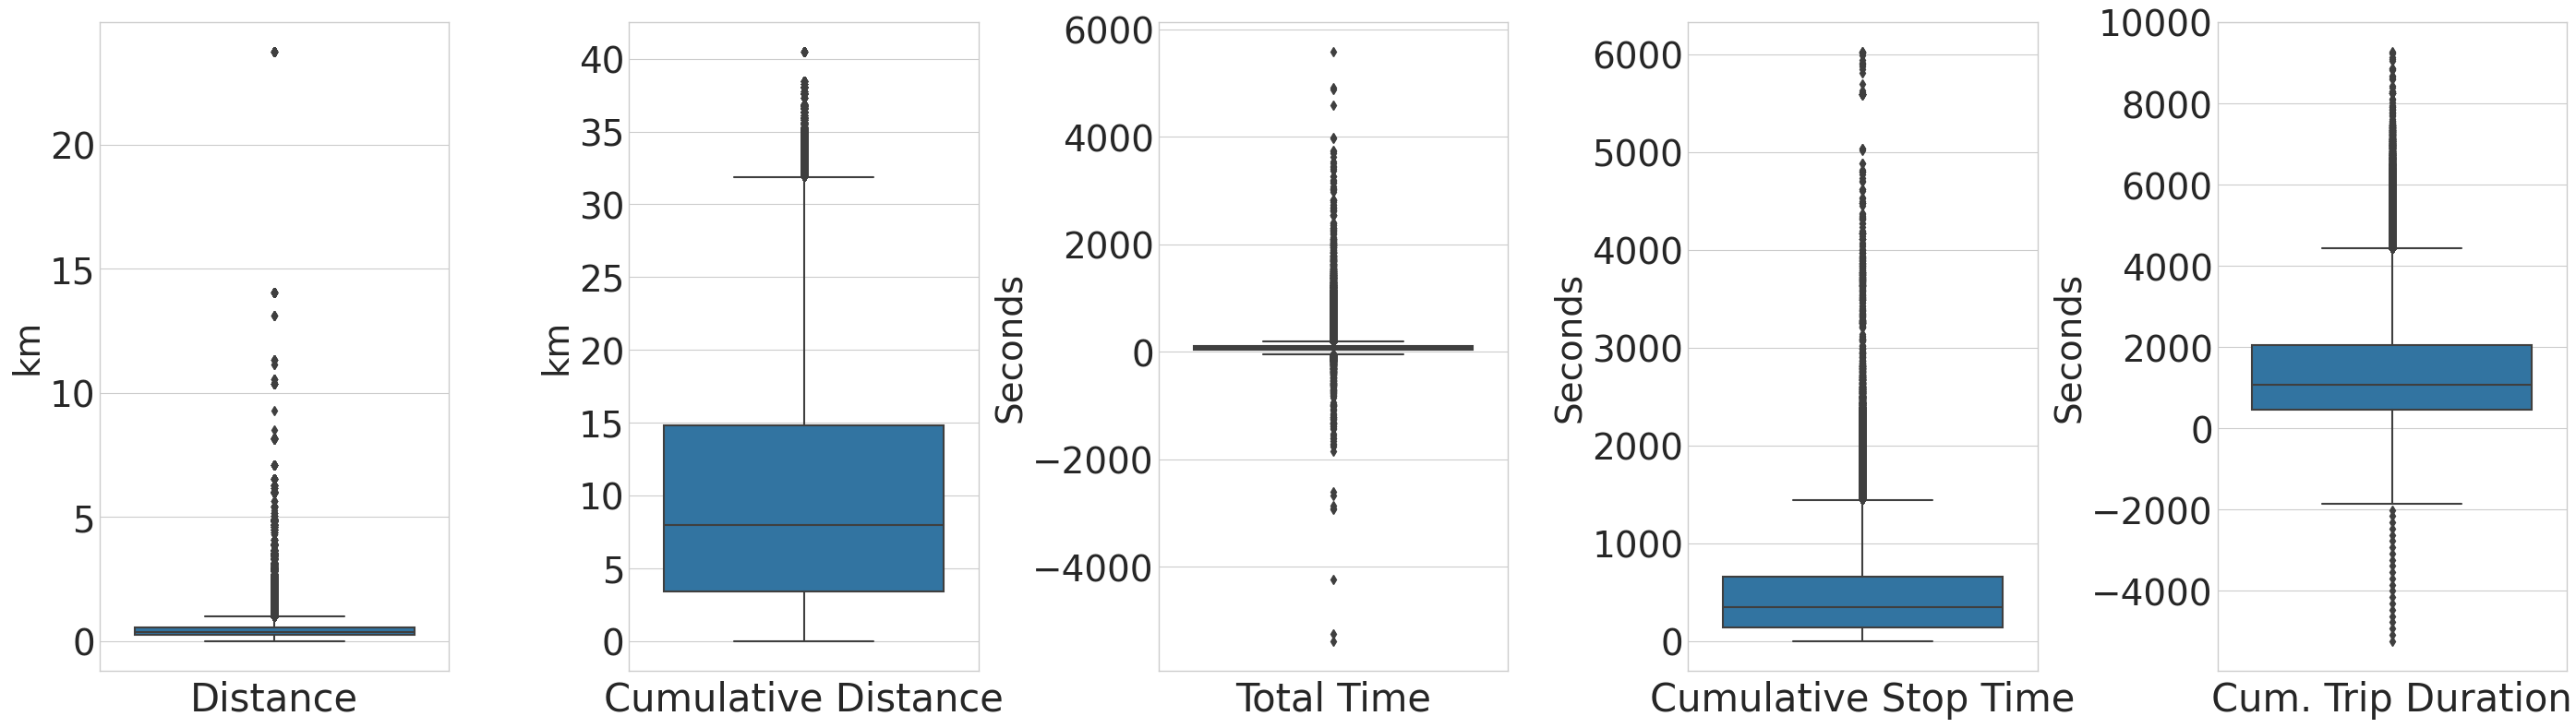

In [24]:
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum']
tts_columns_en = ['Distance', 'Cumulative Distance', 'Total Time', 'Cumulative Stop Time', 'Cum. Trip Duration']
tts_columns_eny = ['km', 'km', 'Seconds', 'Seconds', 'Seconds']

# Number of columns to plot at a time
cols_to_plot = len(tts_columns)

# Criar subplots
fig, axs = plt.subplots(1, cols_to_plot, figsize=(28, 8))

# Plot box plots for the first 4 columns in tts_columns
for i in range(cols_to_plot):
    sns.boxplot(y=df[tts_columns[i]], ax=axs[i])
    axs[i].set_title("")
    axs[i].set_ylabel(tts_columns_eny[i], fontsize=28) 
    axs[i].set_xlabel(tts_columns_en[i], fontsize=30)
    axs[i].tick_params(axis='both', labelsize=28)

plt.tight_layout()
plt.savefig("boxplot2-sunt.png", dpi=600)
plt.show()

### Violon Plot

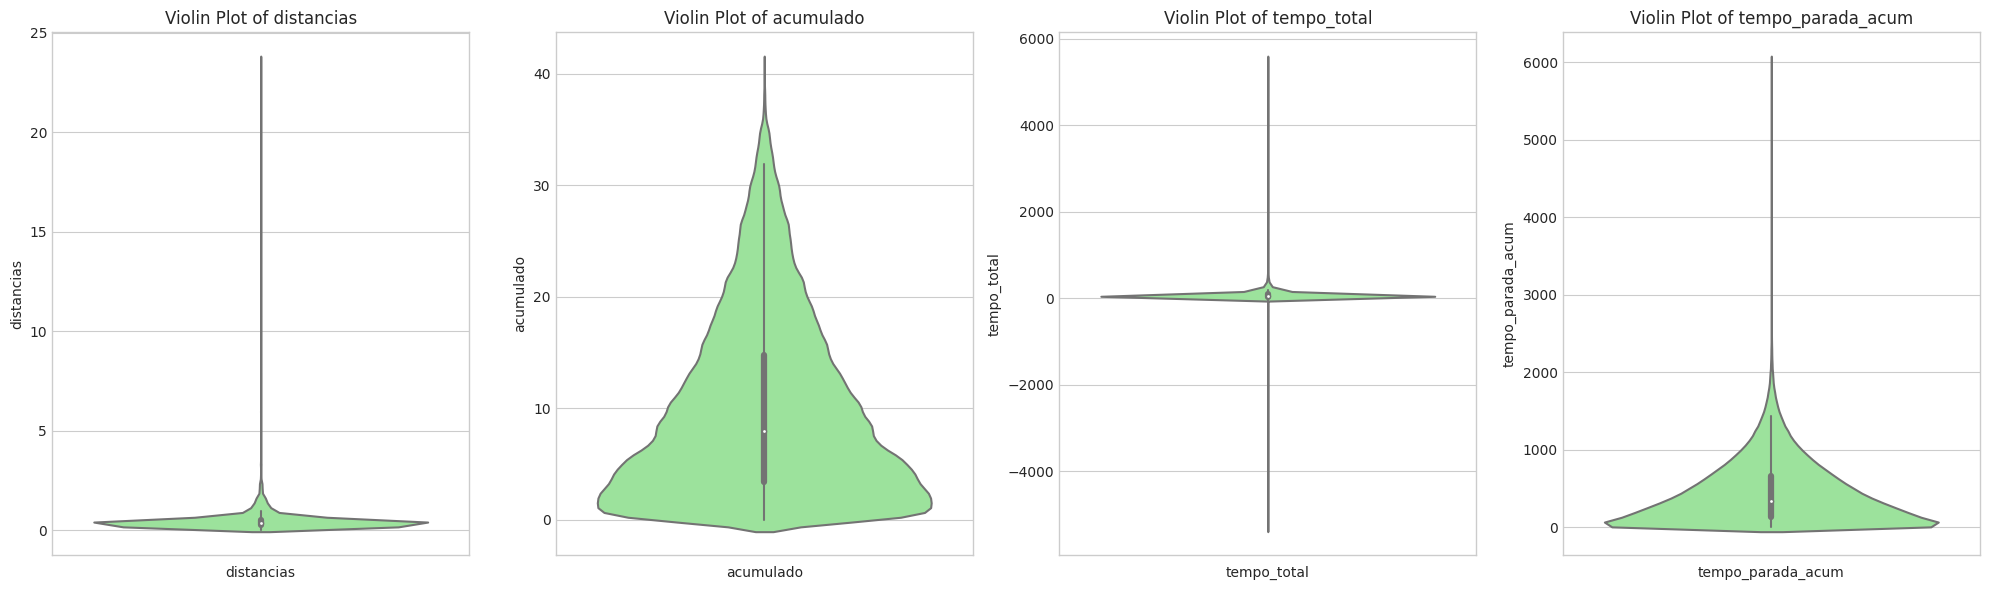

In [26]:
# Define columns for plots
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum', 'dis_acum', 'vm_acum']
cols_to_plot = 4

fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))

for i in range(cols_to_plot):
    sns.violinplot(y=df[tts_columns[i]], color='lightgreen', ax=axs[i])
    axs[i].set_title(f'Violin Plot of {tts_columns[i]}')
    axs[i].set_xlabel(tts_columns[i])
    
plt.tight_layout()
plt.show()

### Histogram

In [27]:
tts_columns = ['distancias', 'acumulado', 'tempo_total', 'tempo_parada_acum', 'duracao_acum']
tts_columns_en = ['Distance', 'Cumulative Distance', 'Total Time', 'Cumulative Stop Time', 'Cum. Trip Duration']
tts_columns_eny = ['km', 'km', 'Seconds', 'Seconds', 'Seconds']

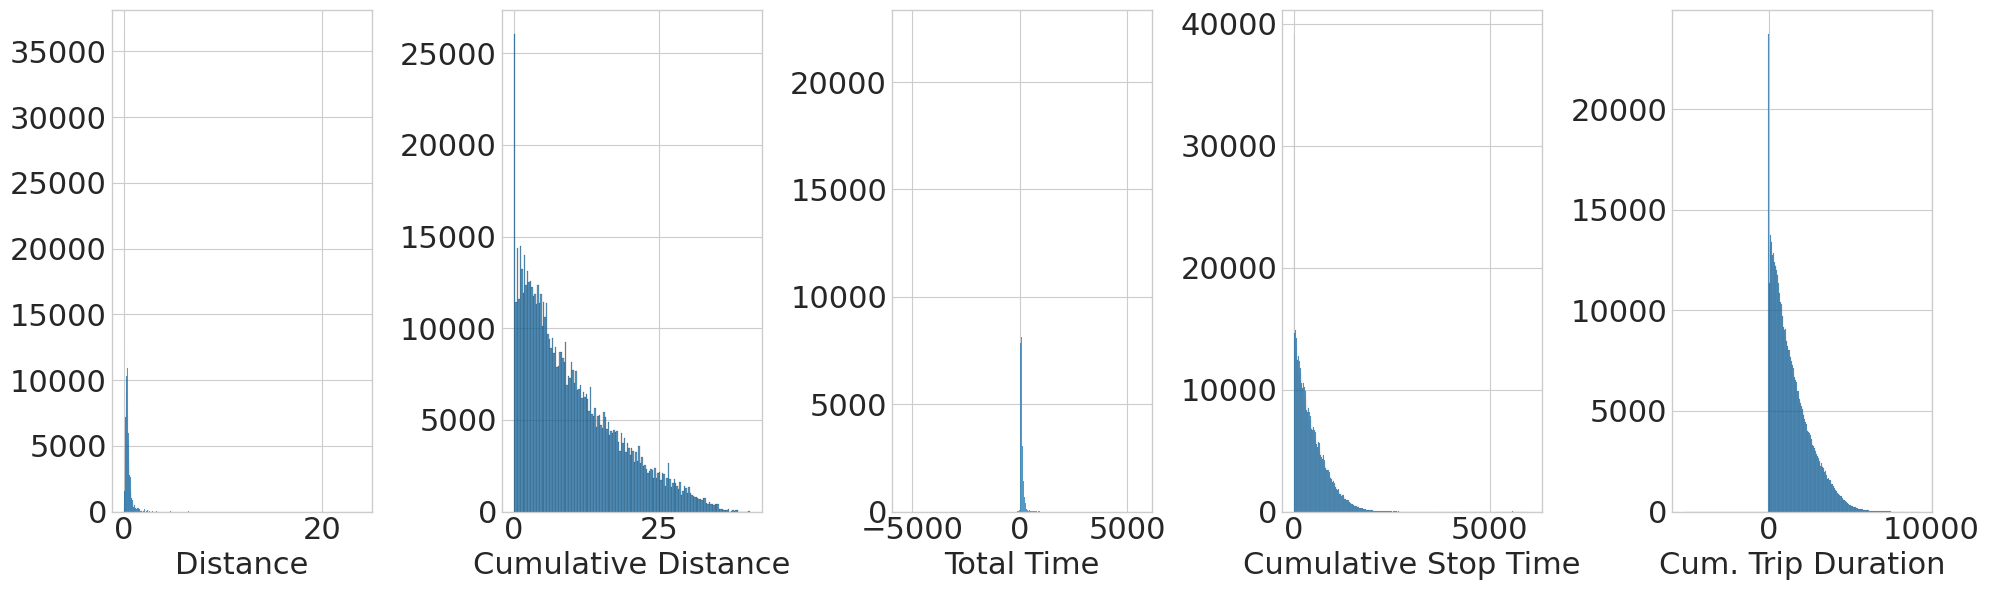

In [28]:
cols_to_plot = 5

fig, axs = plt.subplots(1, cols_to_plot, figsize=(20, 6))
for i in range(cols_to_plot):
    sns.histplot(df[tts_columns[i]], kde=False,  ax=axs[i])
    axs[i].set_xlabel(tts_columns_en[i], fontsize=22)
    axs[i].set_ylabel('', fontsize=22)
    axs[i].tick_params(axis='both', labelsize=22)
plt.tight_layout()

plt.savefig("hist2-sunt.png", dpi=300)
plt.show()